<a href="https://colab.research.google.com/github/markmark345/CS-360-issviewer/blob/master/CS245_predict_sex_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **รายงานหัวข้อเรื่อง อัตราส่วนเพศในประเทศกลุ่มอาเซียน ปี ค.ศ. 2011-2018** 


---


เป็นส่วนหนึ่งของโปรเจควิชา cs245 
จัดทำโดย

*   นาย ณัฐพัชร อนุโรจน์ 6209650016

*   นาย นิติภูมิ นุชน้อย 6209650354
*   นาย ศุภวิชญ์ อิทธิศิริเวทย์ 6209650370


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
from sklearn.cluster import KMeans
from pandas.plotting import  scatter_matrix
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sex-ratio.csv')
df

,Year,Brunei Darussalam,Cambodia,Indonesia,Lao PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam,ASEAN
0,2011,112.0,95.4,100.2,99.8,106.1,97.7,101.1,97.2,96.5,97.9,99.5
1,2012,107.0,95.6,101.4,100.2,106.0,97.7,101.1,97.0,96.4,97.9,99.9
2,2013,107.4,94.3,101.0,99.9,105.8,97.7,101.0,96.8,96.3,98.2,99.8
3,2014,107.6,96.0,101.0,100.0,106.3,93.1,101.0,96.7,95.2,97.4,99.2
4,2015,108.0,96.2,101.0,100.0,105.5,97.2,101.8,96.5,96.2,97.3,99.8
5,2016,108.0,94.9,101.0,100.0,106.9,92.7,101.8,96.3,95.5,97.3,99.4
6,2017,108.0,95.1,101.0,100.6,106.9,92.5,101.8,96.1,94.3,98.1,99.4
7,2018,111.7,95.2,91.8,100.6,106.8,92.4,101.8,95.9,95.0,97.7,95.6


In [ ]:
df.keys()

Index(['Year', 'Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR',
       'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand',
       'Vietnam', 'ASEAN'],
      dtype='object')

In [ ]:
# data cleaning
print("Dataset Nan: ")
print(df.isna().sum())
print()
print("Data duplicate: ", df.duplicated().sum())

Dataset Nan: 
Year                 0
Brunei Darussalam    0
Cambodia             0
Indonesia            0
Lao PDR              0
Malaysia             0
Myanmar              0
Philippines          0
Singapore            0
Thailand             0
Vietnam              0
ASEAN                0
dtype: int64

Data duplicate:  0


In [ ]:
print("ndim: ", df.ndim)
print("shape: ", df.shape)
print("size: ", df.size)

ndim:  2
shape:  (8, 12)
size:  96


,Year,Brunei Darussalam,Cambodia,Indonesia,Lao PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam,ASEAN
0,2011,112.0,95.4,100.2,99.8,106.1,97.7,101.1,97.2,96.5,97.9,99.5
1,2012,107.0,95.6,101.4,100.2,106.0,97.7,101.1,97.0,96.4,97.9,99.9
2,2013,107.4,94.3,101.0,99.9,105.8,97.7,101.0,96.8,96.3,98.2,99.8
3,2014,107.6,96.0,101.0,100.0,106.3,93.1,101.0,96.7,95.2,97.4,99.2
4,2015,108.0,96.2,101.0,100.0,105.5,97.2,101.8,96.5,96.2,97.3,99.8
5,2016,108.0,94.9,101.0,100.0,106.9,92.7,101.8,96.3,95.5,97.3,99.4
6,2017,108.0,95.1,101.0,100.6,106.9,92.5,101.8,96.1,94.3,98.1,99.4
7,2018,111.7,95.2,91.8,100.6,106.8,92.4,101.8,95.9,95.0,97.7,95.6



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               8 non-null      int64  
 1   Brunei Darussalam  8 non-null      float64
 2   Cambodia           8 non-null      float64
 3   Indonesia          8 non-null      float64
 4   Lao PDR            8 non-null      float64
 5   Malaysia           8 non-null      float64
 6   Myanmar            8 non-null      float64
 7   Philippines        8 non-null      float64
 8   Singapore          8 non-null      float64
 9   Thailand           8 non-null      float64
 10  Vietnam            8 non-null      float64
 11  ASEAN              8 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 896.0 bytes


None

,Brunei Darussalam,Cambodia,Indonesia,Lao PDR,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam,ASEAN
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000
mean,108.712500,95.337500,99.800000,100.137500,106.287500,95.125000,101.42500,96.562500,95.675000,97.725000,99.075000
std,1.969364,0.609303,3.249615,0.306769,0.533017,2.632082,0.40267,0.447014,0.799553,0.357571,1.425031
min,107.000000,94.300000,91.800000,99.800000,105.500000,92.400000,101.00000,95.900000,94.300000,97.300000,95.600000
25%,107.550000,95.050000,100.800000,99.975000,105.950000,92.650000,101.07500,96.250000,95.150000,97.375000,99.350000
50%,108.000000,95.300000,101.000000,100.000000,106.200000,95.150000,101.45000,96.600000,95.850000,97.800000,99.450000
75%,108.925000,95.700000,101.000000,100.300000,106.825000,97.700000,101.80000,96.850000,96.325000,97.950000,99.800000
max,112.000000,96.200000,101.400000,100.600000,106.900000,97.700000,101.80000,97.200000,96.500000,98.200000,99.900000


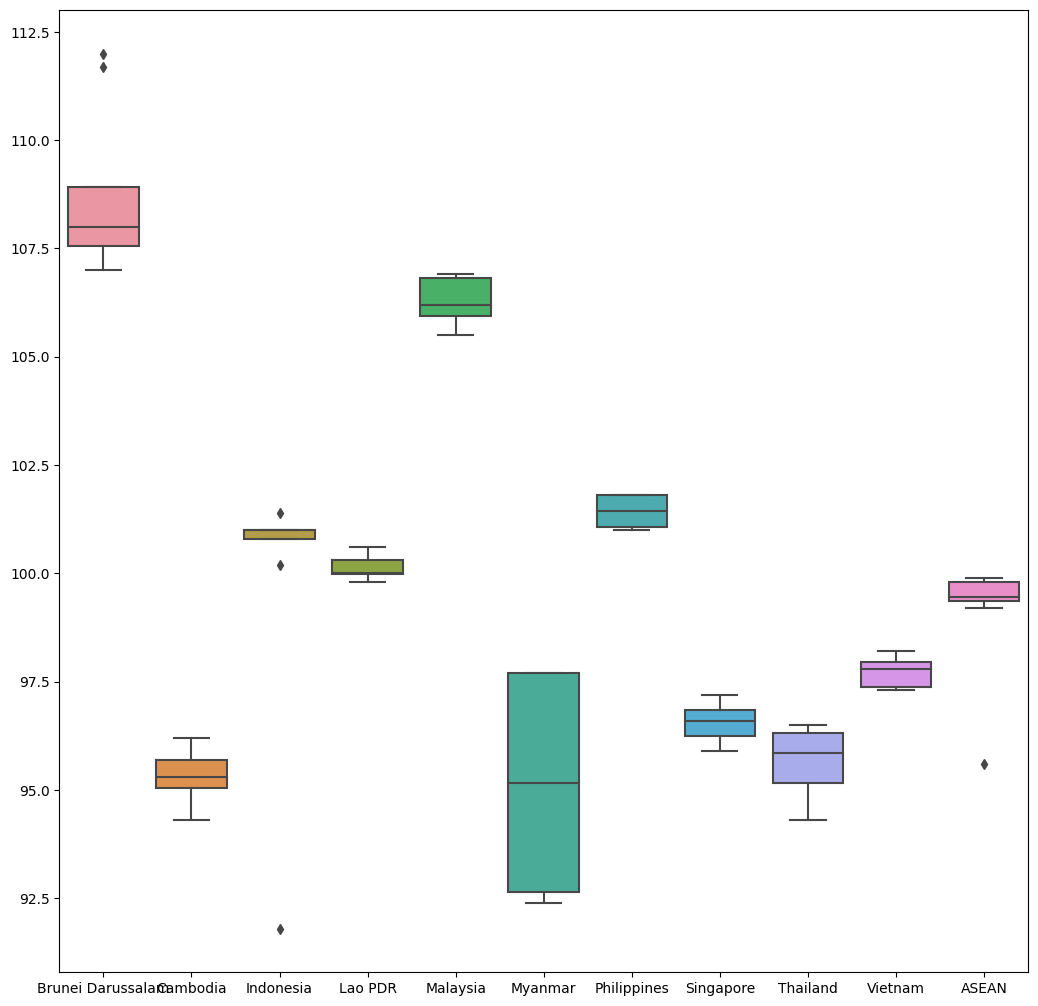

In [ ]:
display(df.head(8))
print()
display(df.info())
print()
display(df.drop(['Year'], axis=1) .describe())
print()
f = plt.figure(figsize=(12.5, 12.5))
gs = f.add_gridspec(2, 2)

sns.boxplot(data=df.drop(['Year'], axis=1))

In [ ]:
grouped = df.groupby('Year')

print(grouped.get_group(2011))
print()
print(grouped.get_group(2012))
print()
print(grouped.get_group(2013))
print()
print(grouped.get_group(2014))
print()
print(grouped.get_group(2015))
print()
print(grouped.get_group(2016))
print()
print(grouped.get_group(2017))
print()
print(grouped.get_group(2018))
print()

grouped_sum = df.groupby('Year').sum()
print()
print(grouped_sum)

   Year  Brunei Darussalam  Cambodia  Indonesia  Lao PDR  Malaysia  Myanmar  \
0  2011              112.0      95.4      100.2     99.8     106.1     97.7   

   Philippines  Singapore  Thailand  Vietnam  ASEAN  
0        101.1       97.2      96.5     97.9   99.5  

   Year  Brunei Darussalam  Cambodia  Indonesia  Lao PDR  Malaysia  Myanmar  \
1  2012              107.0      95.6      101.4    100.2     106.0     97.7   

   Philippines  Singapore  Thailand  Vietnam  ASEAN  
1        101.1       97.0      96.4     97.9   99.9  

   Year  Brunei Darussalam  Cambodia  Indonesia  Lao PDR  Malaysia  Myanmar  \
2  2013              107.4      94.3      101.0     99.9     105.8     97.7   

   Philippines  Singapore  Thailand  Vietnam  ASEAN  
2        101.0       96.8      96.3     98.2   99.8  

   Year  Brunei Darussalam  Cambodia  Indonesia  Lao PDR  Malaysia  Myanmar  \
3  2014              107.6      96.0      101.0    100.0     106.3     93.1   

   Philippines  Singapore  Thailand  

In [ ]:
#จัดอันดับ
pdtabulate=lambda data:tabulate(data,headers='keys')
col1 = df[['Year', 'Brunei Darussalam']]
col2 = df[['Year', 'Cambodia']]
col3 = df[['Year', 'Indonesia']]
col4 = df[['Year', 'Lao PDR']]
col5 = df[['Year', 'Malaysia']]
col6 = df[['Year', 'Myanmar']]
col7 = df[['Year', 'Philippines']]
col8 = df[['Year', 'Singapore']]
col9 = df[['Year', 'Thailand']]
col10 = df[['Year', 'Vietnam']]
col11 = df[['Year', 'ASEAN']]
df1 = col1.sort_values(['Brunei Darussalam'],ascending=False).groupby('Year').head()
df1 = df1.head(10)
df2 = col2.sort_values(['Cambodia'],ascending=False).groupby('Year').head()
df2 = df2.head(10)
df3 = col3.sort_values(['Indonesia'],ascending=False).groupby('Year').head()
df3 = df3.head(10)
df4 = col4.sort_values(['Lao PDR'],ascending=False).groupby('Year').head()
df4 = df4.head(10)
df5 = col5.sort_values(['Malaysia'],ascending=False).groupby('Year').head()
df5 = df5.head(10)
df6 = col6.sort_values(['Myanmar'],ascending=False).groupby('Year').head()
df6 = df6.head(10)
df7 = col7.sort_values(['Philippines'],ascending=False).groupby('Year').head()
df7 = df7.head(10)
df8 = col8.sort_values(['Singapore'],ascending=False).groupby('Year').head()
df8 = df8.head(10)
df9 = col9.sort_values(['Thailand'],ascending=False).groupby('Year').head()
df9 = df9.head(10)
df10 = col10.sort_values(['Vietnam'],ascending=False).groupby('Year').head()
df10 = df10.head(10)
df11 = col11.sort_values(['ASEAN'],ascending=False).groupby('Year').head()
df11 = df11.head(10)

dataset = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]

In [ ]:
#แสดง 10 อันดับจังหวัดอัตราผู้ป๋วยสูงที่สุด
for i in dataset:
 print(pdtabulate(i))
 print()

      Year    Brunei Darussalam
--  ------  -------------------
 0    2011                112
 7    2018                111.7
 4    2015                108
 5    2016                108
 6    2017                108
 3    2014                107.6
 2    2013                107.4
 1    2012                107

      Year    Cambodia
--  ------  ----------
 4    2015        96.2
 3    2014        96
 1    2012        95.6
 0    2011        95.4
 7    2018        95.2
 6    2017        95.1
 5    2016        94.9
 2    2013        94.3

      Year    Indonesia
--  ------  -----------
 1    2012        101.4
 2    2013        101
 3    2014        101
 4    2015        101
 5    2016        101
 6    2017        101
 0    2011        100.2
 7    2018         91.8

      Year    Lao PDR
--  ------  ---------
 6    2017      100.6
 7    2018      100.6
 1    2012      100.2
 3    2014      100
 4    2015      100
 5    2016      100
 2    2013       99.9
 0    2011       99.8

      Year    

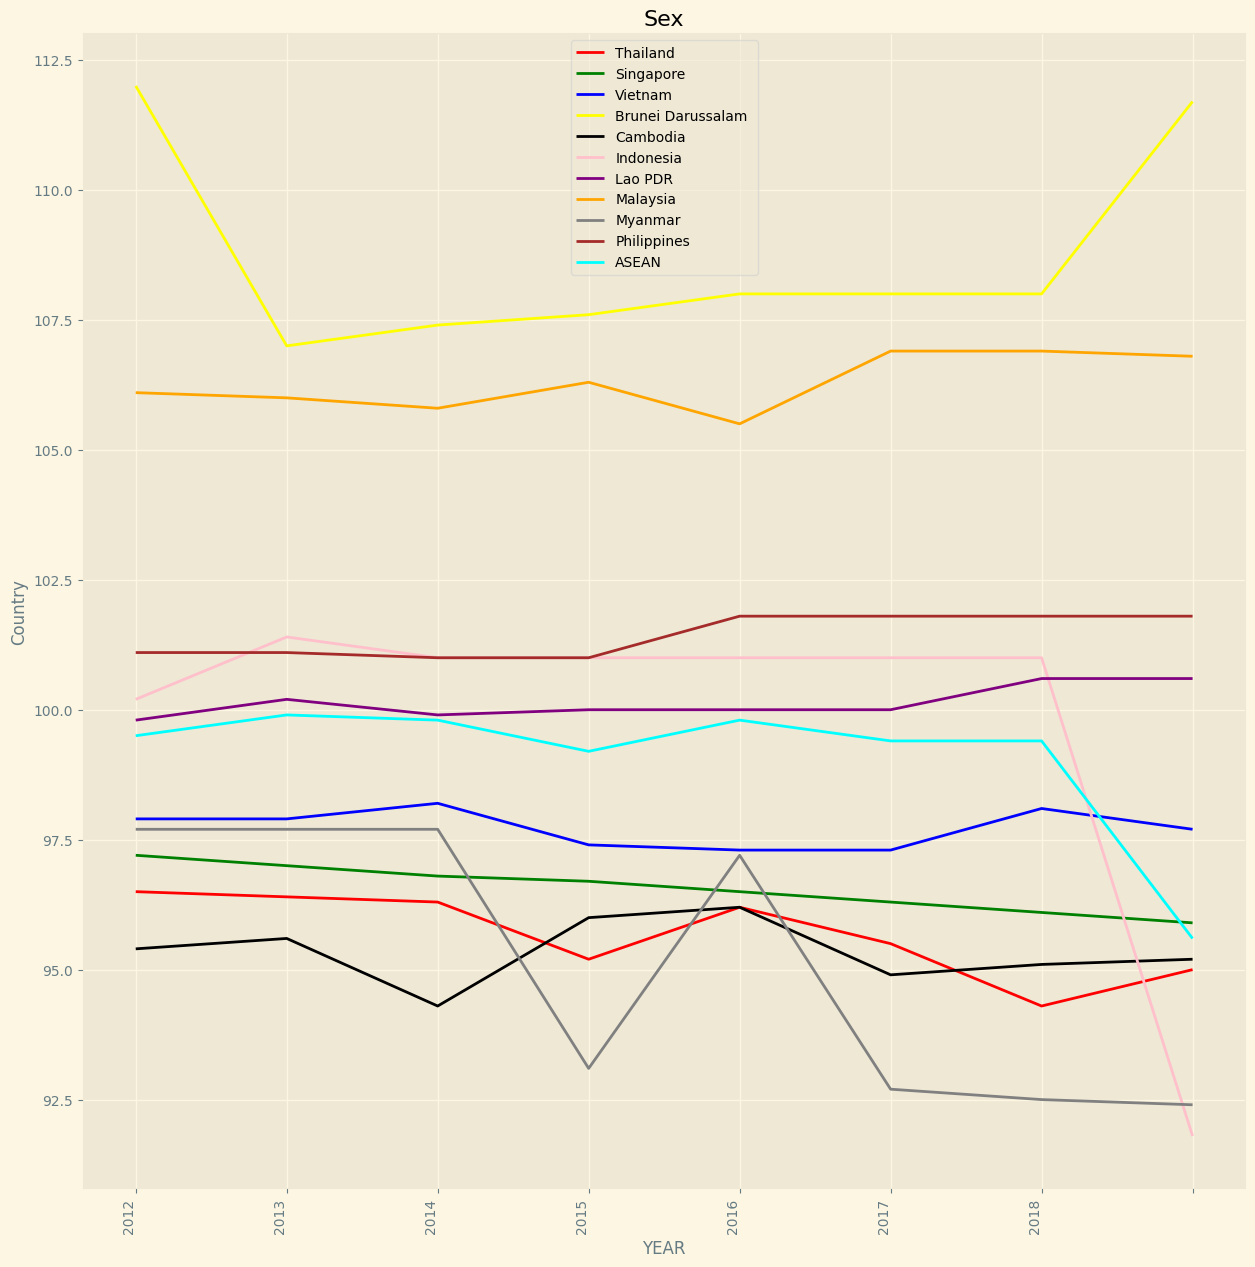

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,15))
plt.plot(df['Year'], df['Thailand'],'r',color = 'red', label= u'Thailand')
plt.plot(df['Year'], df['Singapore'],'r',color = 'green', label= u'Singapore')
plt.plot(df['Year'], df['Vietnam'],'r',color = 'blue', label= u'Vietnam')
plt.plot(df['Year'], df['Brunei Darussalam'],'r',color = 'yellow', label= u'Brunei Darussalam ')
plt.plot(df['Year'], df['Cambodia'],'r',color = 'black', label= u'Cambodia')
plt.plot(df['Year'], df['Indonesia'],'r',color = 'pink', label= u'Indonesia')
plt.plot(df['Year'], df['Lao PDR'],'r',color = 'purple', label= u'Lao PDR')
plt.plot(df['Year'], df['Malaysia'],'r',color = 'orange', label= u'Malaysia')
plt.plot(df['Year'], df['Myanmar'],'r',color = 'gray', label= u'Myanmar')
plt.plot(df['Year'], df['Philippines'],'r',color = 'brown', label= u'Philippines')
plt.plot(df['Year'], df['ASEAN'],'r',color = 'Cyan', label= u'ASEAN')
plt.title(u'Sex')
plt.ylabel(u'Country')
plt.xlabel(u'YEAR')
leg = plt.legend(loc='best', fancybox=True)
leg.get_frame().set_alpha(0.5)
ax = plt.gca()
ax.set_xticklabels(df['Year'], rotation = 90, ha="right")

plt.show()

Text(0, 0.5, 'SEX')

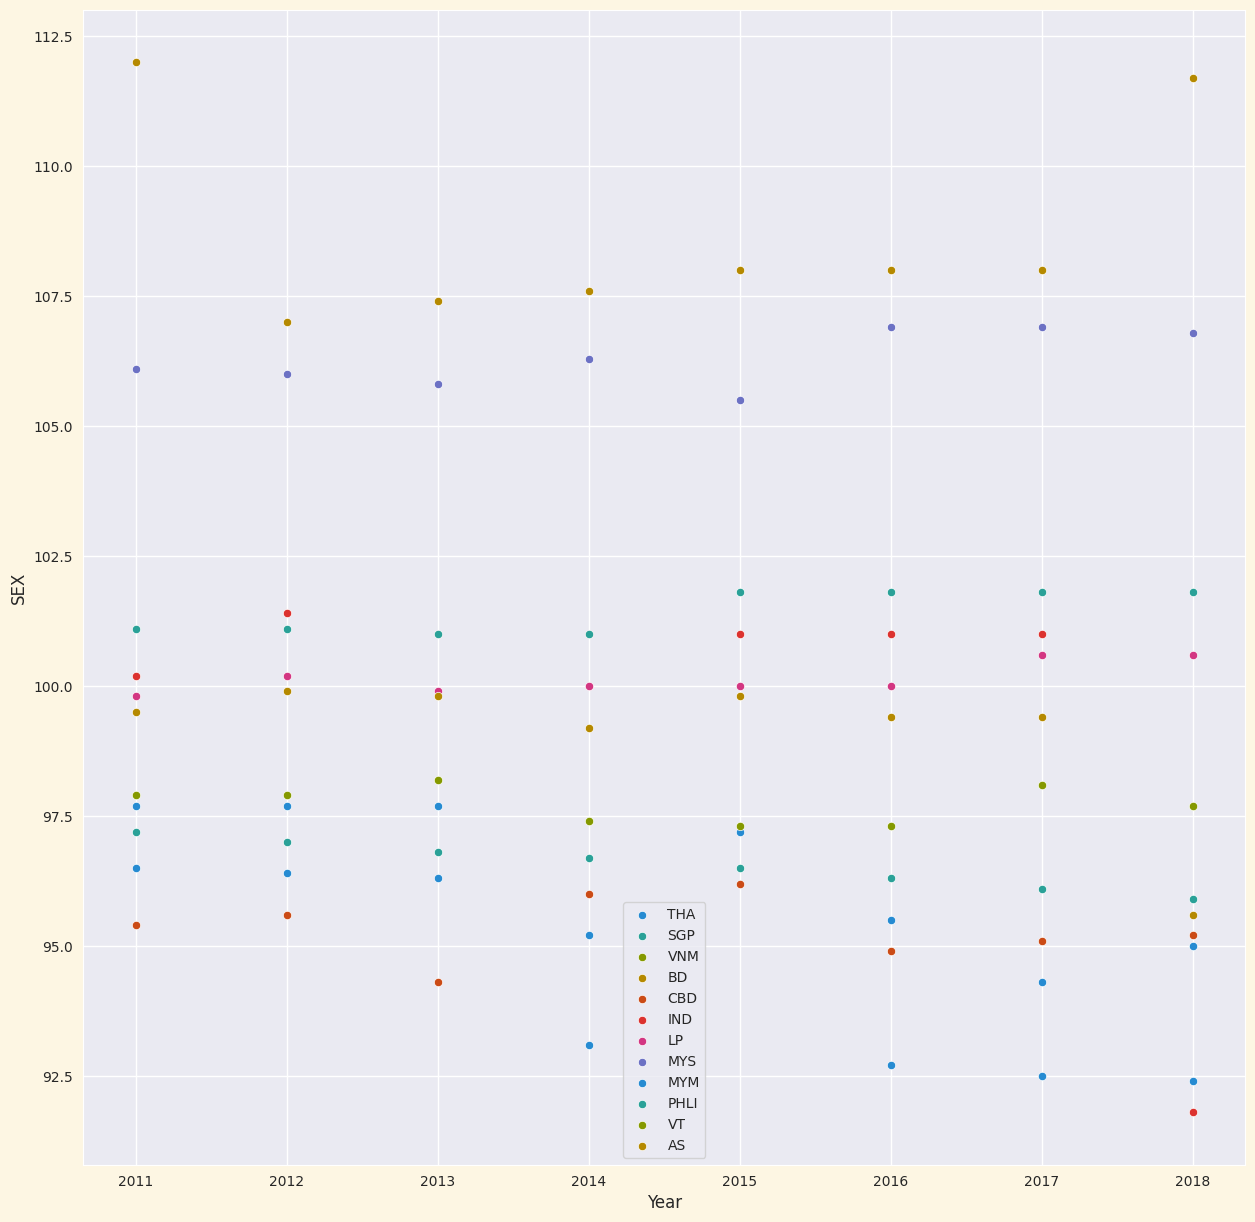

In [ ]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.scatterplot(x=df['Year'], y=df['Thailand'], label='THA')
sns.scatterplot(x=df['Year'], y=df['Singapore'], label='SGP')
sns.scatterplot(x=df['Year'], y=df['Vietnam'], label='VNM')
sns.scatterplot(x=df['Year'], y=df['Brunei Darussalam'], label='BD')
sns.scatterplot(x=df['Year'], y=df['Cambodia'], label='CBD')
sns.scatterplot(x=df['Year'], y=df['Indonesia'], label='IND')
sns.scatterplot(x=df['Year'], y=df['Lao PDR'], label='LP')
sns.scatterplot(x=df['Year'], y=df['Malaysia'], label='MYS')
sns.scatterplot(x=df['Year'], y=df['Myanmar'], label='MYM')
sns.scatterplot(x=df['Year'], y=df['Philippines'], label='PHLI')
sns.scatterplot(x=df['Year'], y=df['Vietnam'], label='VT')
sns.scatterplot(x=df['Year'], y=df['ASEAN'], label='AS')
plt.ylabel('SEX')

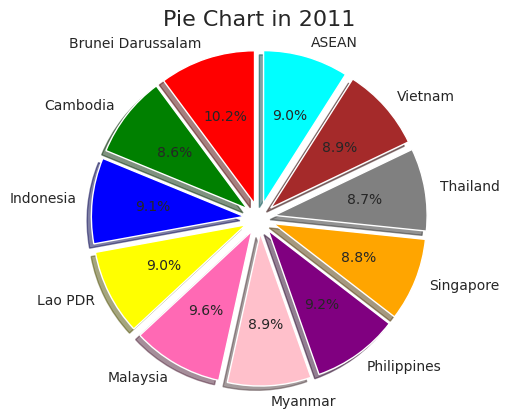

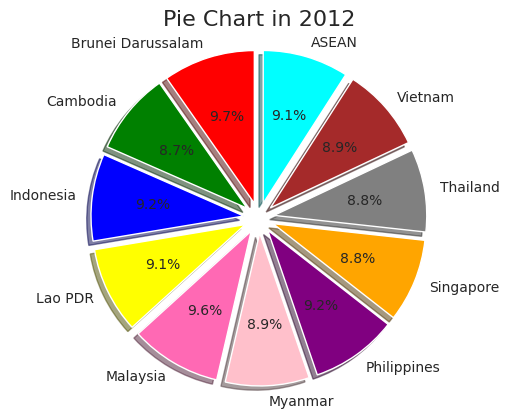

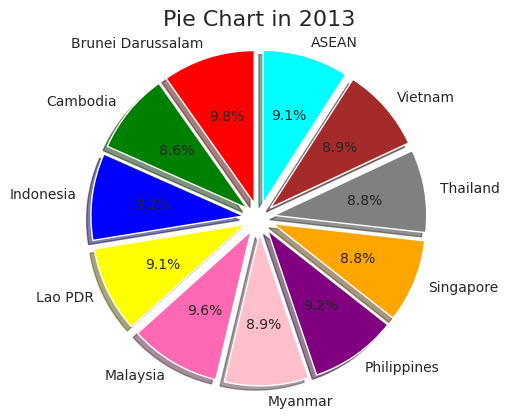

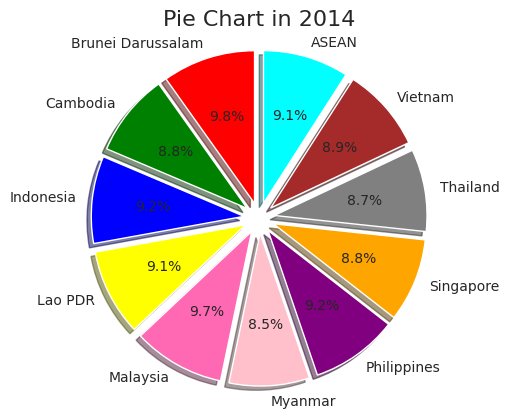

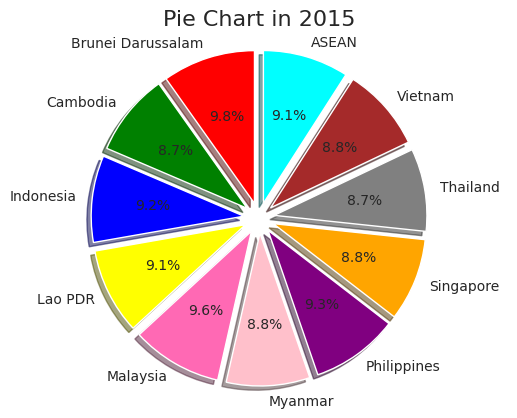

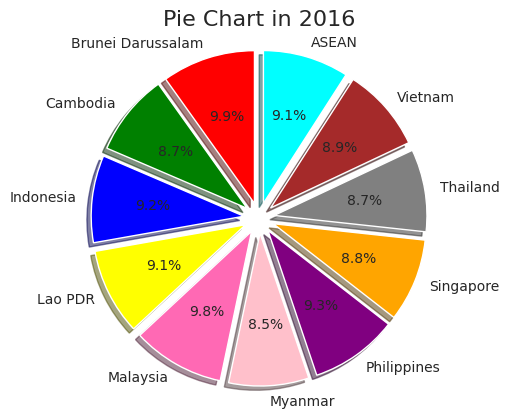

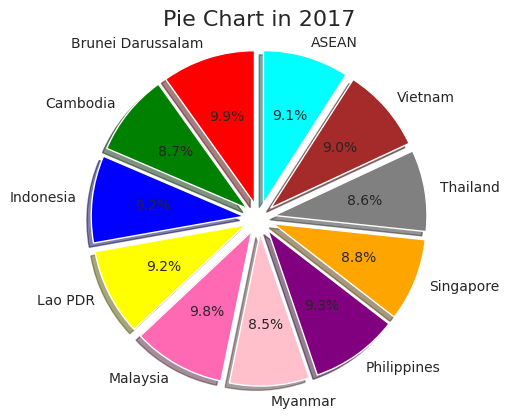

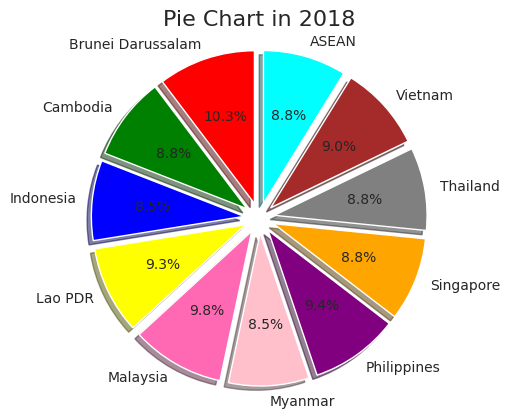

In [ ]:
List = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i in List:
  df2011 = grouped.get_group(i)

  labels = 'Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'ASEAN'
  sections = df2011.drop(['Year'],axis=1)
  colors = ['red', 'green', 'blue', 'yellow', 'HotPink', 'pink', 'purple', 'orange', 'gray', 'brown', 'Cyan']

  explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1) 

  fig1, ax1 = plt.subplots()
  ax1.pie(sections, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
          shadow=True, startangle=90)
  ax1.axis('equal') 

  plt.title('Pie Chart in %i' %i)
  plt.show()

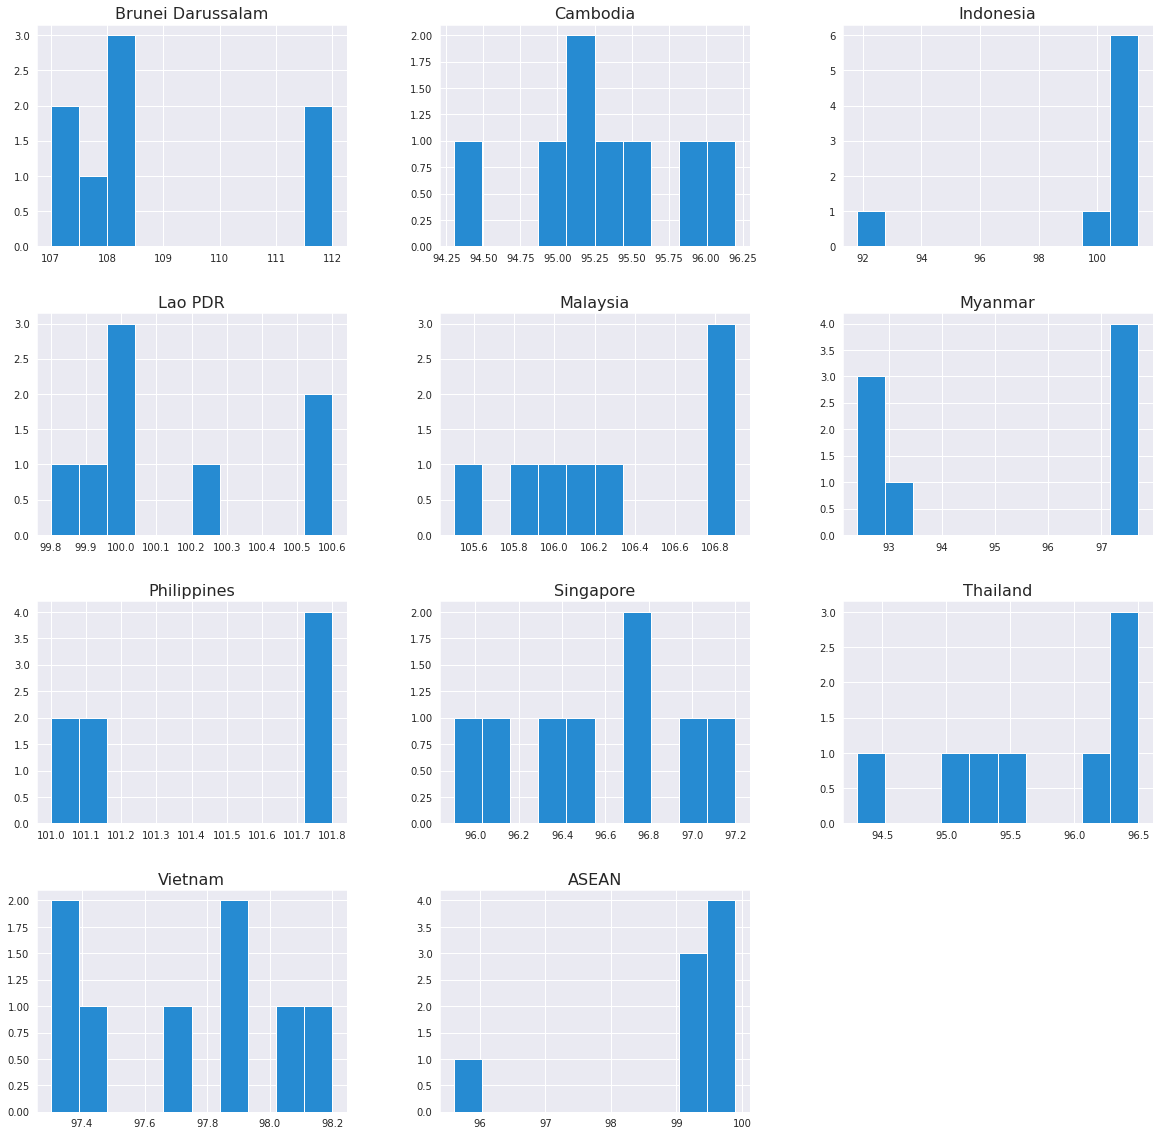

In [ ]:
dfn = df.drop(['Year'], axis=1)
_ = dfn.hist(sharex=False, figsize=(20, 20))

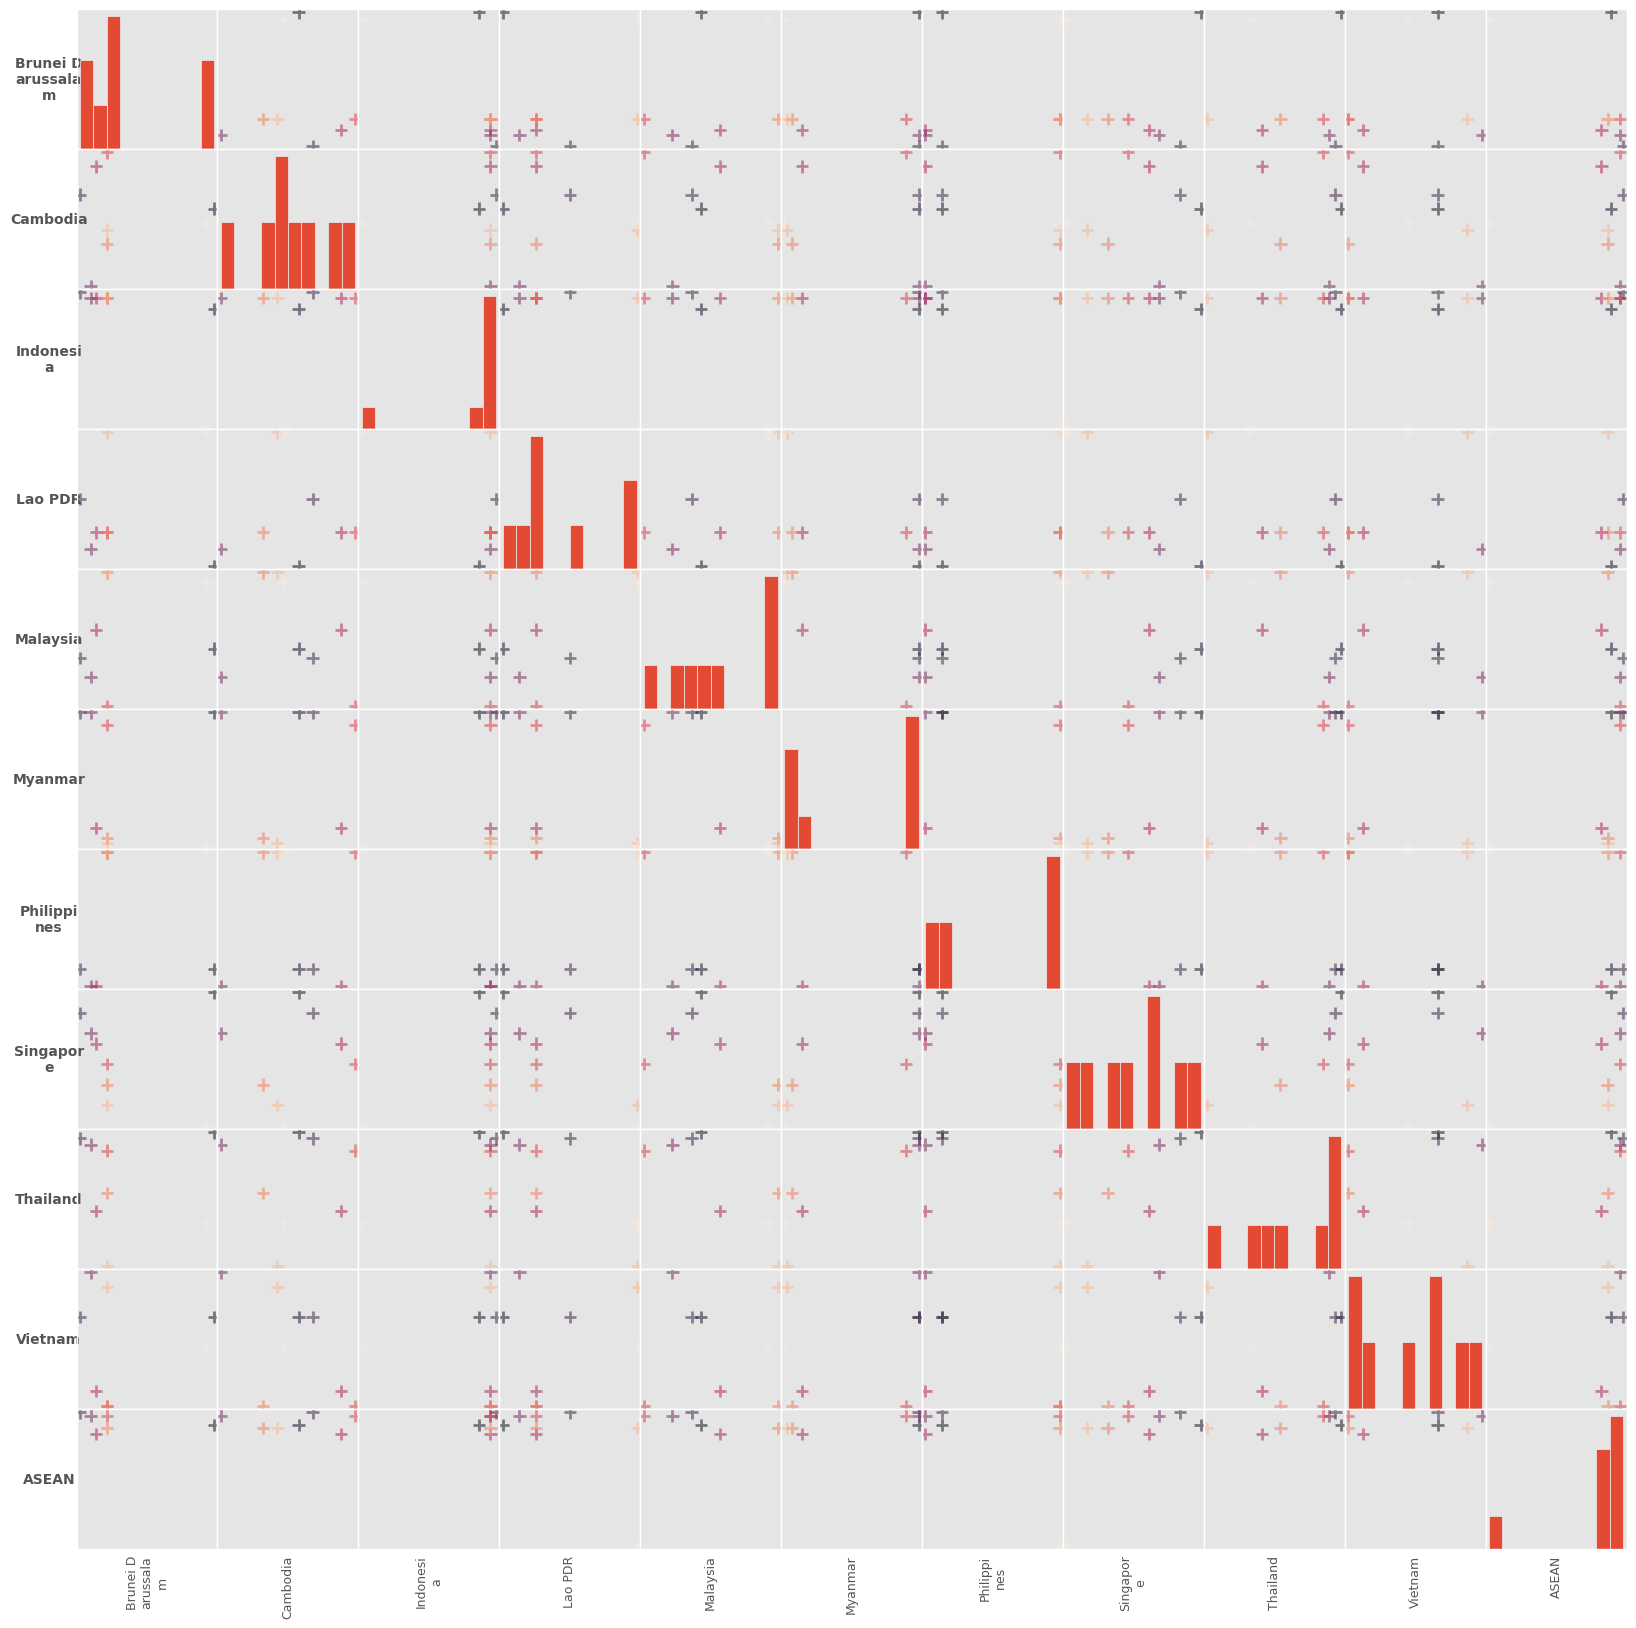

In [ ]:
fontdict={'fontsize': 11,
          'weight' : 'bold'}

fontdicty={'fontsize': 10,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 9,
          'horizontalalignment': 'center'}

plt.style.use('ggplot')
y=df.index
axs = scatter_matrix(df.drop(['Year'], axis=1), c=y ,figsize=(20, 20), marker='+', s=80)

def wrap(txt, width=8):
    '''helper function to wrap tex for long labels'''
    import textwrap
    return '\n'.join(textwrap.wrap(txt, width))

for ax in axs[:,0]: 
    ax.grid('off', axis='both')
    ax.set_ylabel(wrap(ax.get_ylabel()), rotation=0, va='center', labelpad=20, fontdict=fontdicty)
    ax.set_yticks([])

for ax in axs[-1,:]: 
    ax.grid('off', axis='both')
    ax.set_xlabel(wrap(ax.get_xlabel()), rotation=90, fontdict=fontdictx)
    ax.set_xticks([])

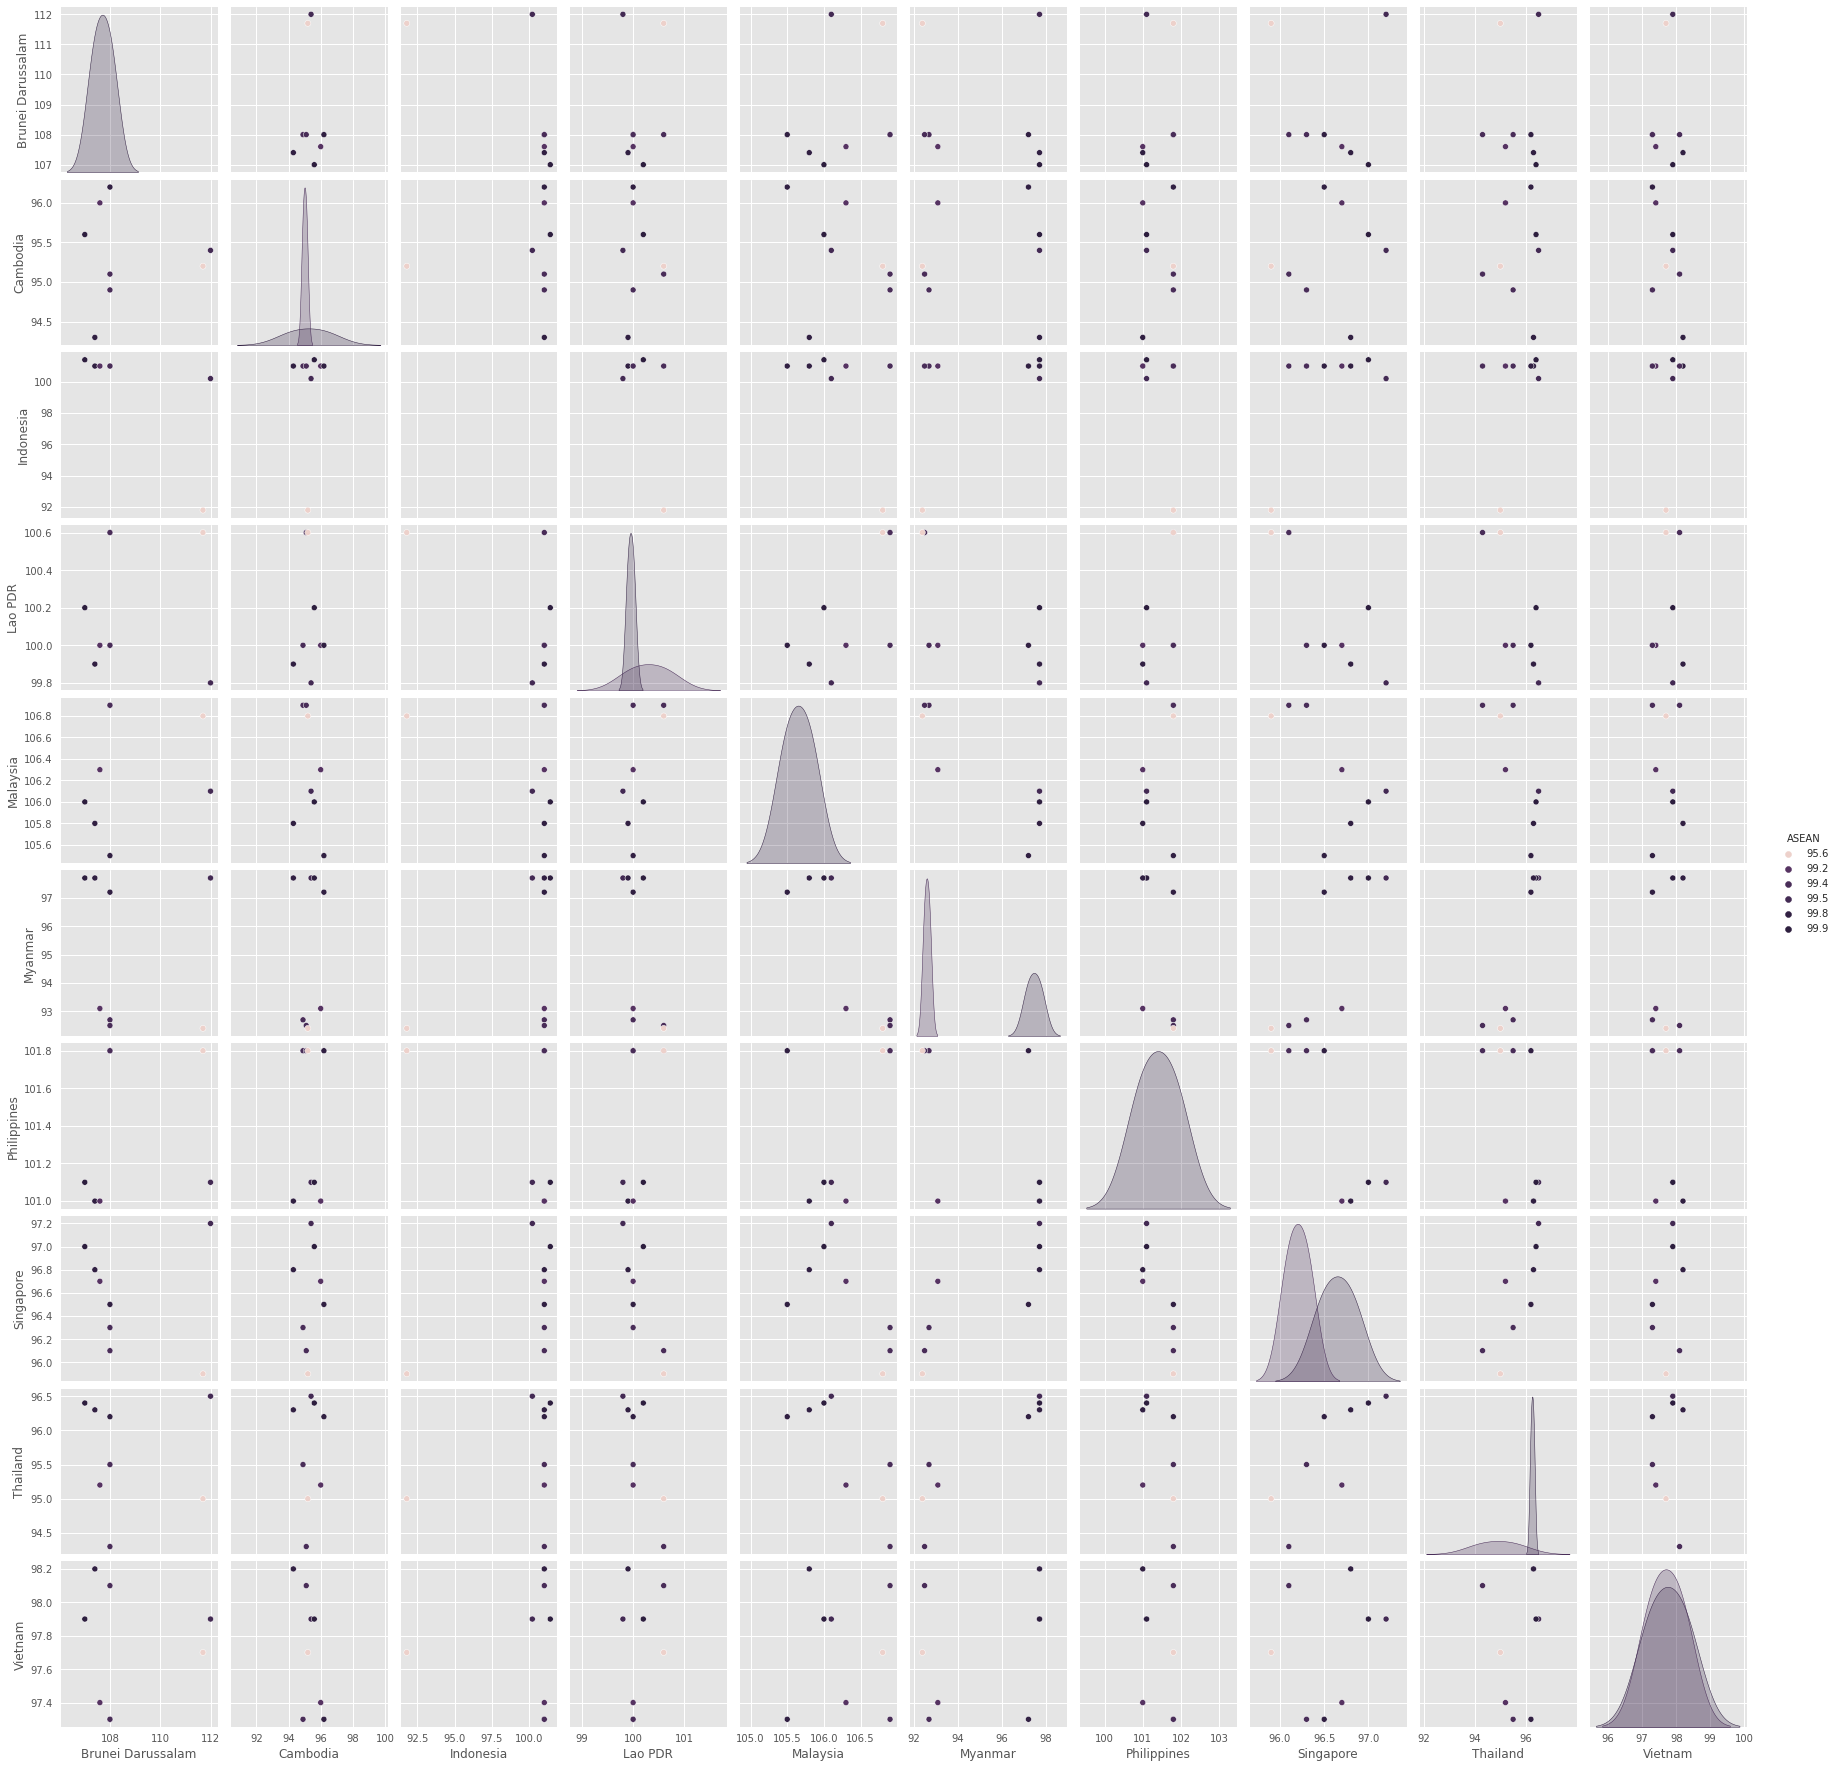

In [ ]:
sns.pairplot(df.drop(['Year'], axis=1), hue='ASEAN')
plt.show()

In [ ]:
x = df['Year'].values.reshape(-1,1)
y = df['Thailand']

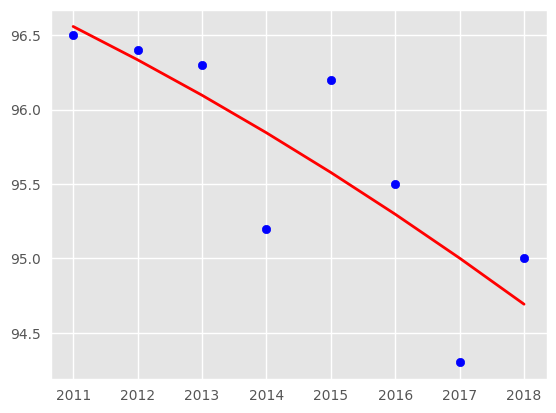

In [ ]:
#ชาย ลดลง
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly,y)
y_predict = model.predict(x_poly)
plt.scatter(x, y, color='b')
plt.plot(x, y_predict, linewidth='2', color='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
print('R2 = {:.5f}'.format(model.score(x_poly,y)))
print('R2 = {:.5f}'.format(r2_score(y, y_predict)))
print('MSE = {:.4e}'.format(mean_squared_error(y, y_predict)))
print('RMSE = {:.4e}'.format(np.sqrt(mean_squared_error(y, y_predict))))

R2 = 0.66933
R2 = 0.66933
MSE = 1.8497e-01
RMSE = 4.3008e-01


In [ ]:
y_predict = model.predict(poly_features.fit_transform([[2019]]))
print('{:.6f}'.format(y_predict[0]))

94.367857
